# FINAL PROJECT PROBABILITY FOR DATA SCIENCE: Random assignment problem


**Student**: Anna Bicelli


**ID**: VR509594

**1) Import libraries:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2) Generate the cost matrix**: define the function *cost_assignment_matrix_C(n)* that creates a random cost matrix of size n x n with values uniformly distributed between 0 and 1. This matrix represents the costs associated with each assignment from the
𝑛
jobs to the
𝑛
 machines.


In [ ]:
def cost_assignment_matrix_C(n):
    C = np.random.uniform(0, 1, (n, n))
    return C

**3) Compute the total cost:** define the funcion *compute_total_cost_An(C, sigma)* that calculates the total cost for a permutation *sigma* of the cost matrix *C*.


**Output:** is the sum of costs corresponding to the indices given by the permutation.


In [ ]:
def compute_total_cost_An(C, sigma):
    return sum(map(lambda i: C[i, sigma[i]], range(len(sigma))))

**4) Metropolis-Hastings with tracking:** implement the Metropolis-Hastings algorithm to explore permutations and track costs.


It generates random permutations, calculates the cost for each permutation and
accepts the new permutation based on an acceptance probability derived from the cost difference.


**Output**: List of permutations and costs over time.

In [ ]:
def metropolis_hastings_with_tracking(C, beta, N, sigma0):
    n = len(C)
    sigma = [sigma0.copy()]
    costs = [compute_total_cost_An(C, sigma0)]
    for t in range (1,N):
        next_sigma_t = np.random.permutation(n)
        new_cost = compute_total_cost_An(C, next_sigma_t)
        acceptance_probability = np.exp(-beta * (new_cost - costs[t-1]))
        if(np.random.uniform(0,1) < min(1,acceptance_probability)):
            sigma.append(next_sigma_t)
            costs.append(new_cost)
        else:
            sigma.append(sigma[t-1])
            costs.append(costs[t-1])
    return sigma, costs

**5) Plot of the cost trends for various dimensions n:** I analize the behavior of costs during the iterations of the algorithm. I define a set of values for
𝑛 ranging from 5 to 50 in increments of 5. Each value represents the size of the cost matrix 𝐶.


I run several simulations collecting the results in plots.


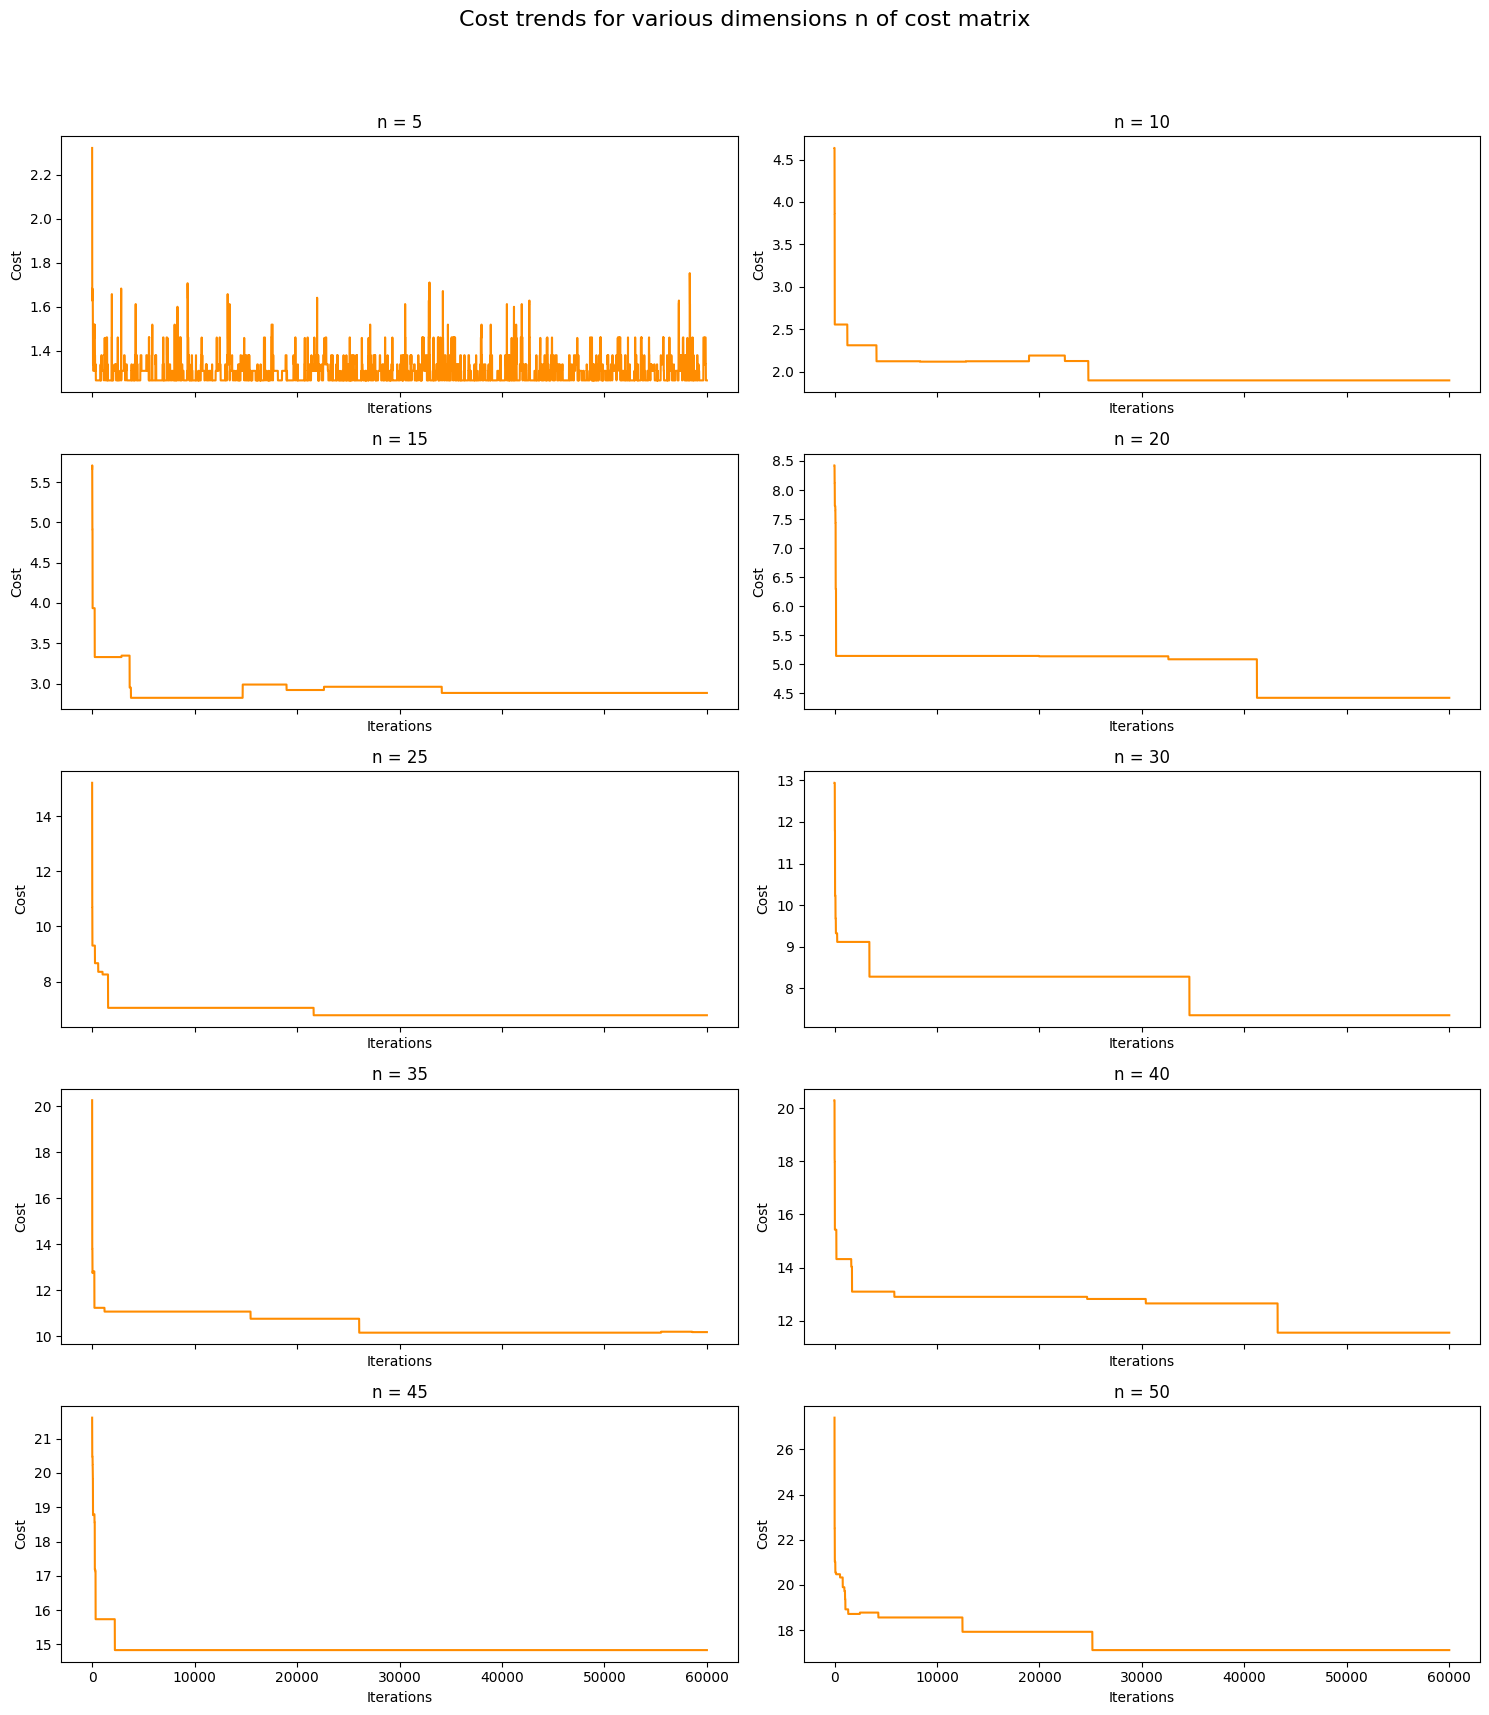

In [ ]:
n_values = [5 * alpha for alpha in range(1, 11)]
fig, axes = plt.subplots(5, 2, figsize=(15, 18), sharex=True)
fig.suptitle('Cost trends for various dimensions n of cost matrix', fontsize=16)

for ax, n in zip(axes.flatten(), n_values):
    N = 60000
    beta = 20
    C = cost_assignment_matrix_C(n)
    sigma0 = np.random.permutation(n)
    _, costs = metropolis_hastings_with_tracking(C, beta, N, sigma0)
    ax.plot(range(N), costs,color='darkorange')
    ax.set_title(f'n = {n}')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From these graphs it can be seen that as the dimension n increases, the trend improved and when the number of steps increases, the cost decreases and tends to stabilize.

 **6) Implement Metropolis-Hastings without Tracking:** This version does not maintain a history of past permutations or costs. It only returns the best permutation found and the final cost.


In [ ]:
def metropolis_hastings_algorithm(C, beta, N, sigma0):
    n = len(sigma0)
    sigma = sigma0.copy()
    cost = compute_total_cost_An(C, sigma0)

    for t in range (1,N):
        next_sigma_t = np.random.permutation(n)
        new_cost = compute_total_cost_An(C, next_sigma_t)
        acceptance_probability = np.e**(beta * (cost - new_cost))
        if(np.random.uniform(0,1) < min(1,acceptance_probability)):
            sigma = next_sigma_t
            cost = new_cost
    return sigma, cost

**7) Estimate the value of E(An):** I define the function *estimate_EA_n(n_values, beta, N, M)* that estimates the expected value
𝐸
(
𝐴
𝑛
)
 for different dimensions n. Runs M experiments for each n, calculating the minimum cost for each experiment and averaging the results.


 **Output:** List of estimates of
𝐸
(
𝐴
𝑛
)


In [ ]:
def estimate_EA_n(n_values, beta, N, M):
    EA_n_estimates = []

    for n in n_values:
        min_costs = []
        for i in range(M):
            C = cost_assignment_matrix_C(n)
            sigma0 = np.random.permutation(n)
            _, costs = metropolis_hastings_algorithm(C, beta, N, sigma0)
            min_costs.append(costs)

        EA_n = np.mean(min_costs)
        EA_n_estimates.append(EA_n)
        print(f'Dimension:{n}, E(A_n)={EA_n}')  # print E(An) for each n

    return EA_n_estimates

**8) Print
𝐸
(
𝐴
𝑛
)
 and plot the trend:** Define the parameters and visualize the trend of
𝐸
(
𝐴
𝑛
)
 estimates as a function of
𝑛
, comparing it to the value
$$\frac{\pi^2}{6}$$


In [ ]:
beta = 20
N = 60000 # Number of steps for Metropolis-Hastings
M = 200   # Number of independent realizations of C
n_values = [5 * alpha for alpha in range(1, 11)] # Dimensions
EA_n_estimates = estimate_EA_n(n_values, beta, N, M)

Dimension:5, E(A_n)=1.167013390057434
Dimension:10, E(A_n)=1.696531002134442
Dimension:15, E(A_n)=3.162596783244028
Dimension:20, E(A_n)=4.8796634160697145
Dimension:25, E(A_n)=6.694952899255702
Dimension:30, E(A_n)=8.525779044699787
Dimension:35, E(A_n)=10.468680139478627
Dimension:40, E(A_n)=12.505397406936758
Dimension:45, E(A_n)=14.486877934047529
Dimension:50, E(A_n)=16.47313069371604


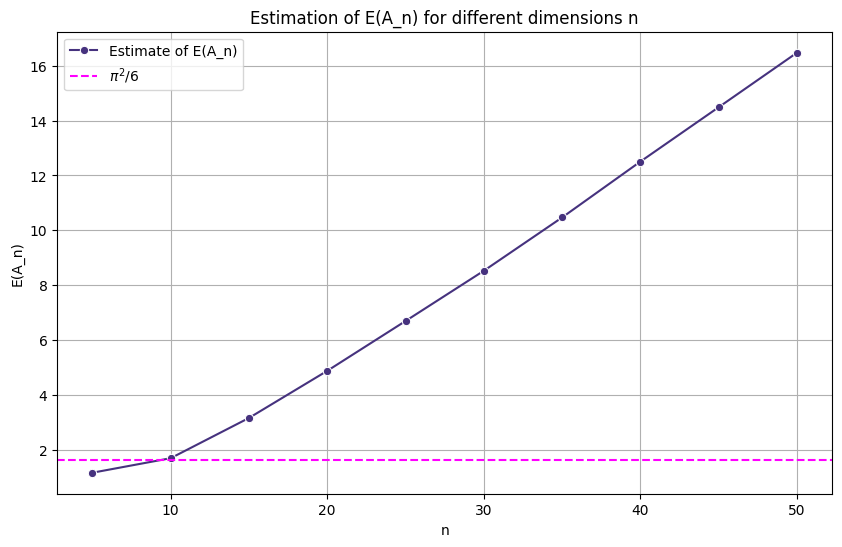

In [ ]:
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_values, y=EA_n_estimates, marker='o', linestyle='-', label='Estimate of E(A_n)')
plt.axhline(y=np.pi**2/6, color='fuchsia', linestyle='--', label=r'$\pi^2 / 6$')
plt.xlabel('n')
plt.ylabel('E(A_n)')
plt.title('Estimation of E(A_n) for different dimensions n')
plt.legend()
plt.grid(True)
plt.show()



It is clear that with these n_values, as
the dimension 𝑛 increases, with the parameters I set, the expectation
E(An)
 does not approach the value
$$\frac{\pi^2}{6}$$

 The Metropolis-Hastings algorithm requires a very high number of iterations to approach the horizontal line, and the wait time would not be reasonable. Therefore, I will reduce the range of values for the matrix dimensions, resulting in smaller matrices.Then I plot the result.

**9) New dimensions:** plot the cost trend for different n

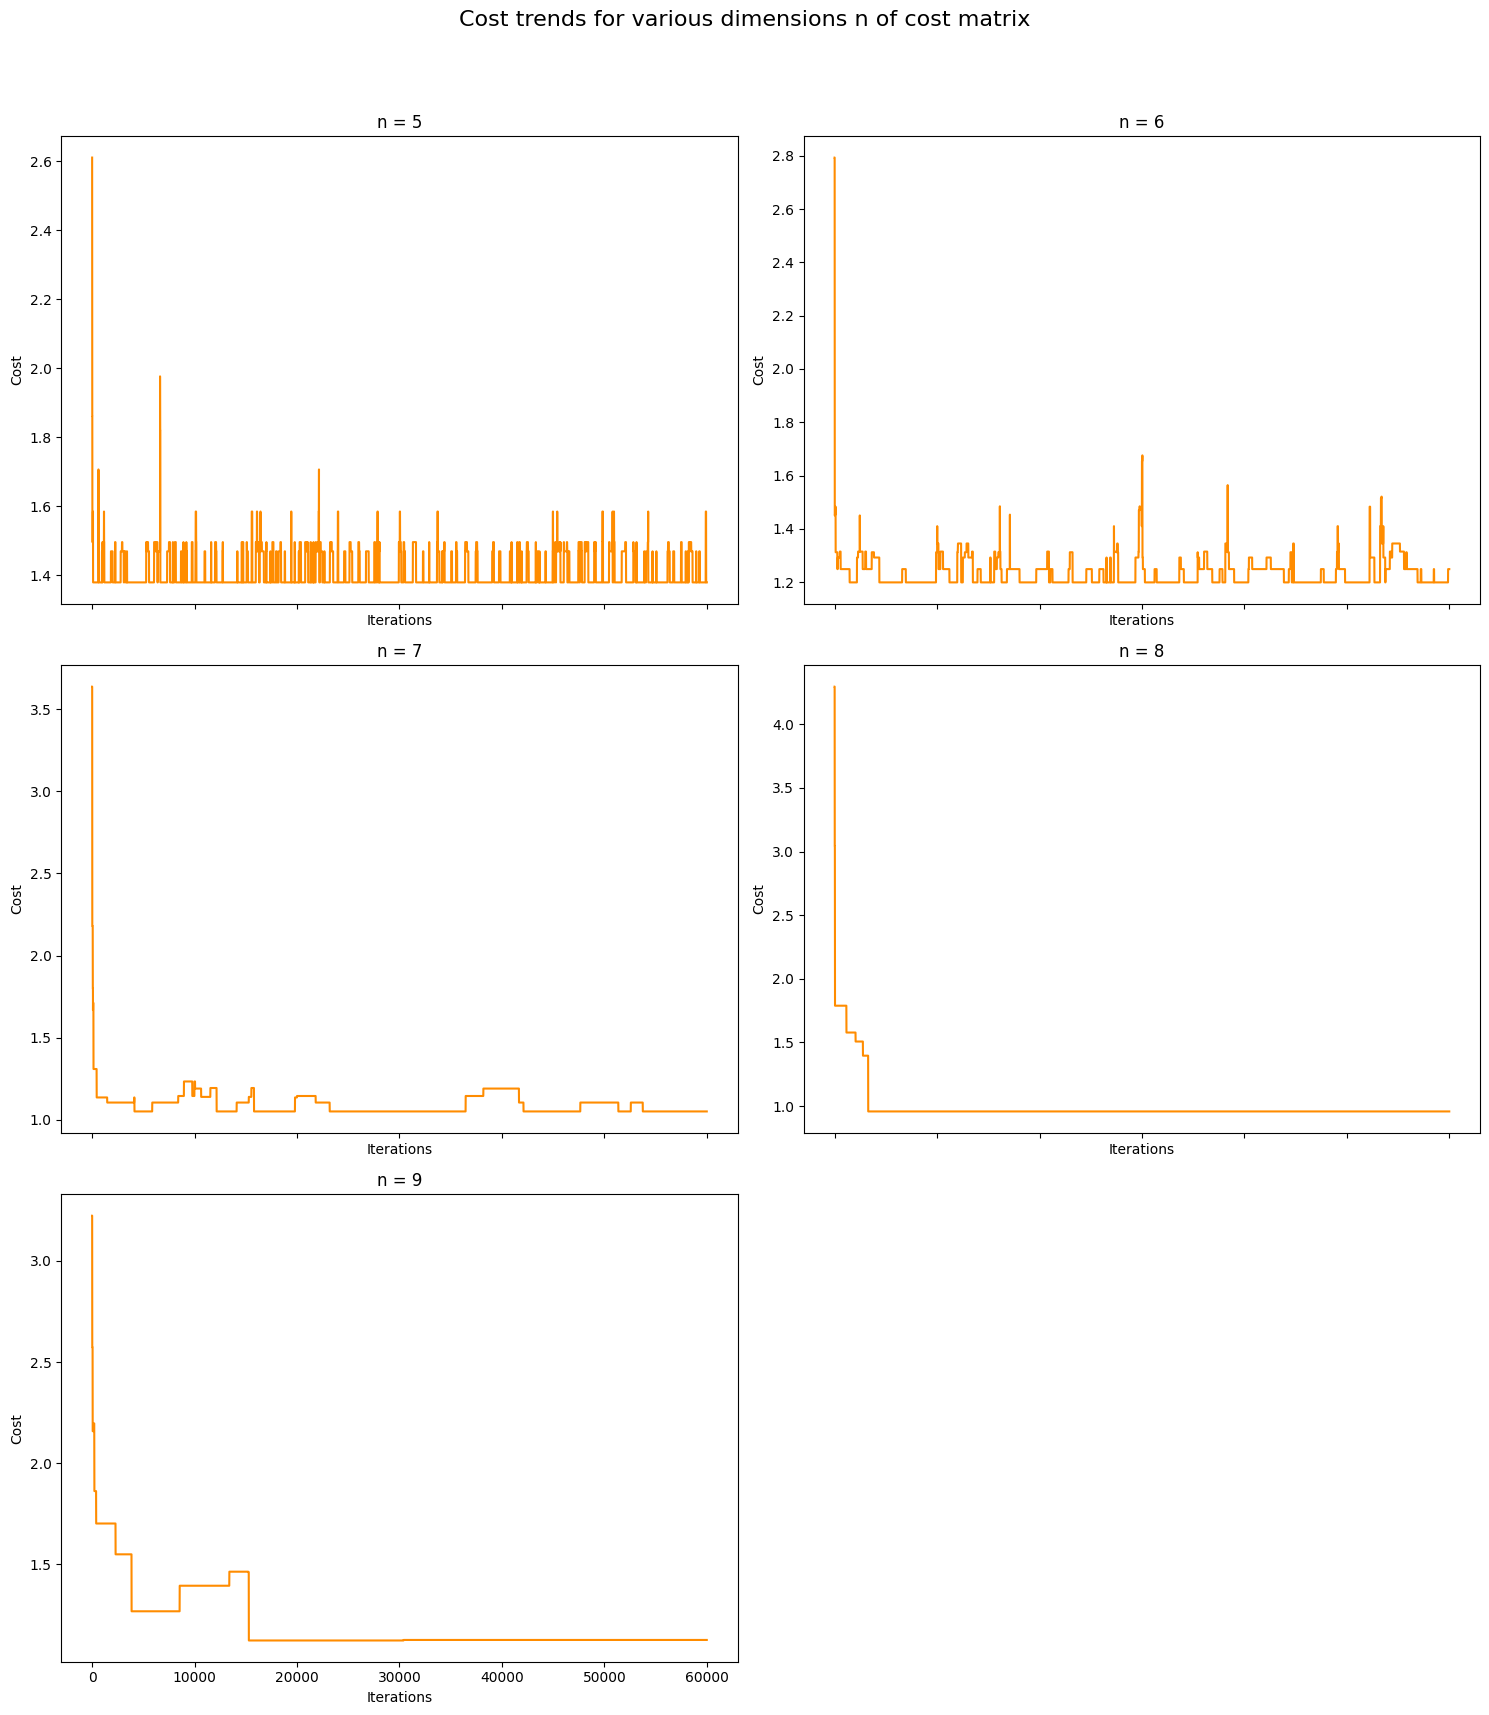

In [ ]:
n_values =  range(5, 10) #smaller range of n_values
fig, axes = plt.subplots(3, 2, figsize=(15, 18), sharex=True)
fig.suptitle('Cost trends for various dimensions n of cost matrix', fontsize=16)

for ax, n in zip(axes.flatten(), n_values):
    N = 60000
    beta = 20
    C = cost_assignment_matrix_C(n)
    sigma0 = np.random.permutation(n)
    _, costs = metropolis_hastings_with_tracking(C, beta, N, sigma0)
    ax.plot(range(N), costs, color='darkorange')
    ax.set_title(f'n = {n}')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')


axes[2, 1].axis('off') # Eliminate the last excess axes
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**10) New dimensions:** prints the estimate of E(An) and plots the final result

In [ ]:
beta = 20
N = 60000 # Number of steps for Metropolis-Hastings
M = 200   # Number of independent realizations
n_values = range(5, 10) #dimensions
EA_n_estimates = estimate_EA_n(n_values, beta, N, M)

Dimension:5, E(A_n)=1.155010188378306
Dimension:6, E(A_n)=1.2204749004447382
Dimension:7, E(A_n)=1.2457350067331117
Dimension:8, E(A_n)=1.3294978043640702
Dimension:9, E(A_n)=1.4830958301040302


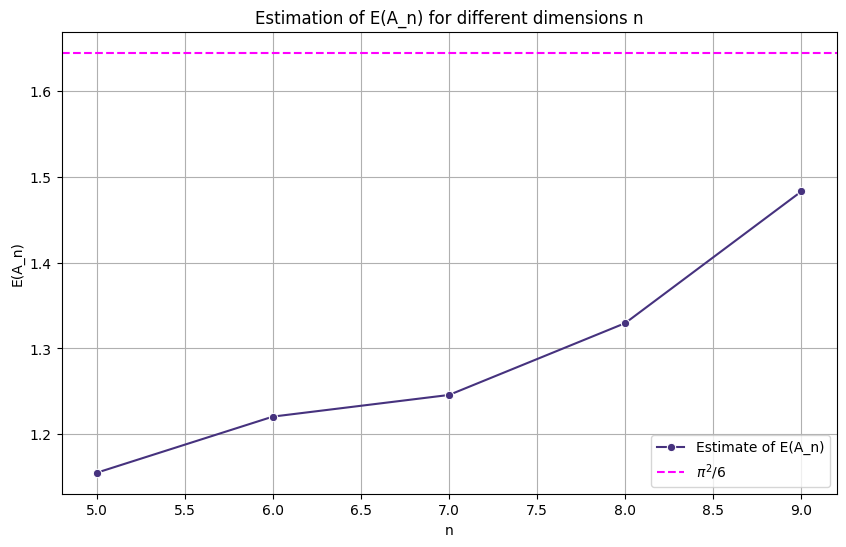

In [ ]:
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_values, y=EA_n_estimates, marker='o', linestyle='-', label='Estimate of E(A_n)')
plt.axhline(y=np.pi**2/6, color='fuchsia', linestyle='--', label=r'$\pi^2 / 6$')
plt.xlabel('n')
plt.ylabel('E(A_n)')
plt.title('Estimation of E(A_n) for different dimensions n')
plt.legend()
plt.grid(True)
plt.show()

In this graph, I can see that the expectation E(An) approaches the default value, as n grows large